<a href="https://colab.research.google.com/github/SamamaSaleem/Breast-Cancer-Detection-using-Logistic-Regression/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

## Importing the libraries

In [56]:
import pandas as pd

## Importing the dataset

In [57]:
dataset = pd.read_csv("breast_cancer.csv")
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [58]:
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Splitting the dataset into the Training set and Test set

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

## Training the Logistic Regression model on the Training set

In [60]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state= 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting the Test set results

In [61]:
y_pred = classifier.predict(X_test)
#print(y_pred)

##Visualizing the Dataset

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

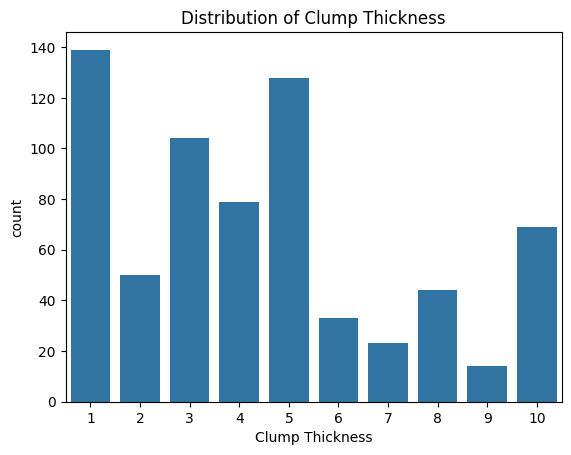

In [63]:
sns.countplot(x='Clump Thickness', data=dataset)
plt.title('Distribution of Clump Thickness')
plt.show()

#sns.pairplot(dataset, hue='Uniformity of Cell Size')
#plt.title('Pairplot of Dataset')
#plt.show()

## Making the Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[84  3]
 [ 3 47]]


## Plotting the Confusion Matrix

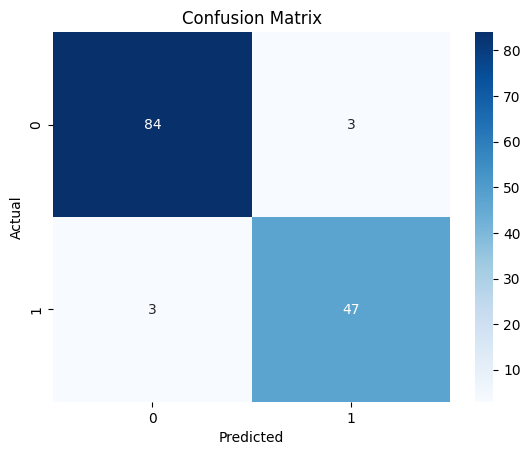

In [65]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [66]:
#Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9562043795620438


## Computing the accuracy with k-Fold Cross Validation

In [67]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:0.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:0.2f} %".format(accuracies.std()*100))

Accuracy: 96.70 %
Standard Deviation: 1.97 %


## Plotting the Accuracies

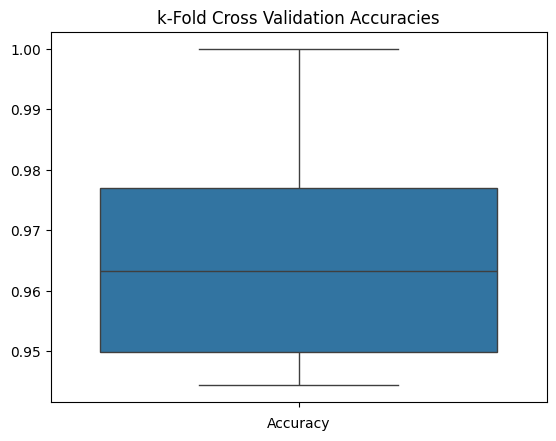

In [68]:
sns.boxplot(data=accuracies)
plt.title('k-Fold Cross Validation Accuracies')
plt.xlabel('Accuracy')
plt.show()